In [21]:
import pandas as pd
import json

In [22]:
df = pd.read_csv('GfG1.csv')
df

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
...,...,...,...,...
7587188,tt9916846,tt1289683,3,18
7587189,tt9916848,tt1289683,3,17
7587190,tt9916850,tt1289683,3,19
7587191,tt9916852,tt1289683,3,20


In [23]:
import requests
import random
import bs4

In [67]:

  def scrape_id(movies_id):      
   user_agents_list =['Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36']
   url="https://www.imdb.com/title/{}/".format(str(movies_id).zfill(7))
   res=requests.get(url,headers ={'User_Agent':random.choice(user_agents_list)})

   data = bs4.BeautifulSoup(res.text)
   current_page = data.find('script',attrs = {'type':"application/ld+json"}) 

   current_page=str(current_page)[str(current_page).find('{'):-9]
   return current_page
 

In [68]:
def getid(num):
 df = pd.read_csv('GfG1.csv')
 start = 0
 end = start + num
 movies = df['parentTconst']
 movies_id = list(movies[start:end])
 return movies_id


 
 

In [93]:
def collectmovie_data(movies_id):
 movie_data = scrape_id(movies_id)   
 movie_info = json.loads(movie_data)
 series={
     'series_name': movie_info['name'],
     'series_genre': movie_info['genre'],
     'series_rating': movie_info['aggregateRating']['ratingValue']
 }
 return series
 
    
 

In [105]:
 ids = getid(10)
ls=[]
rating=[]
 for i in ids:
   x= collectmovie_data(i)
   ls.append(x['series_name'])
   rating.append(float(x['series_rating']))  
  
 

In [114]:
print(ls)

['The Lone Ranger', 'BBC Sunday-Night Theatre', 'BBC Sunday-Night Theatre', 'Studio One', 'BBC Sunday-Night Theatre', 'BBC Sunday-Night Theatre', 'BBC Sunday-Night Theatre', 'The Magnavox Theater', 'Broadway Television Theatre', 'BBC Sunday-Night Theatre']


<BarContainer object of 10 artists>

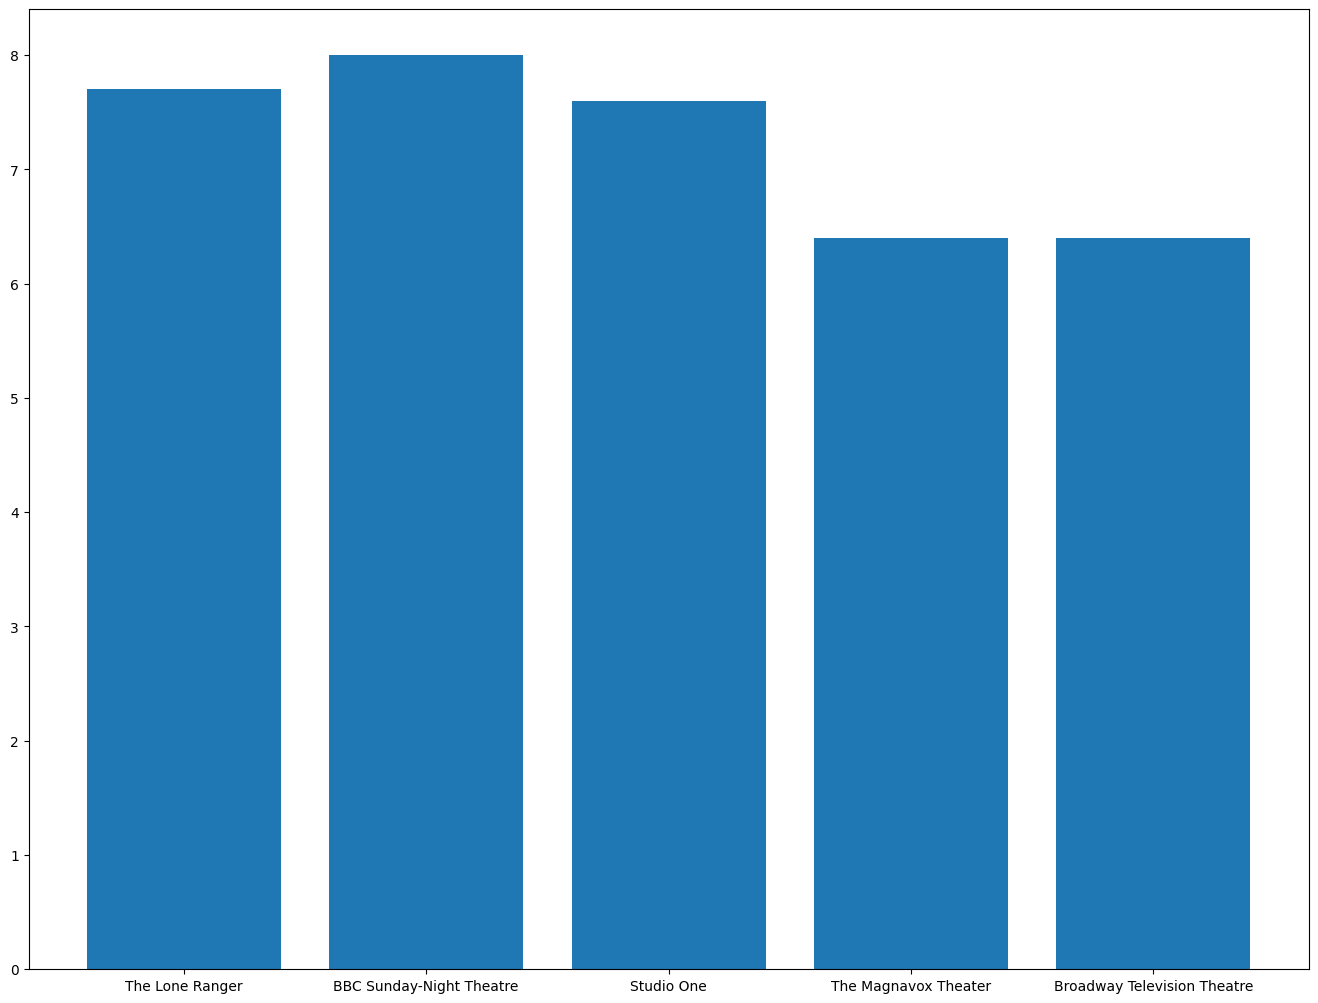

In [113]:
import matplotlib.pyplot as plt
fig = plt.figure()
finalplot = fig.add_axes([0,0,2,2])
finalplot.bar(ls,rating)